In [1]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
from PIL import Image

import os

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as dset


from deepdream import util as ddutil
from deepdream import resnet as ddresnet
from deepdream.deepdream import dream, objective_L2, objective_deepdream, objective_channel, objective_guide

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

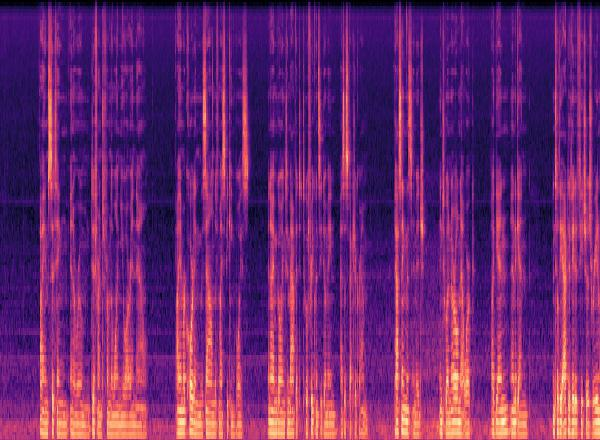

In [2]:
# -------------
# Source image
# -------------

# Sheep - 13
# 1
img_id = 0
# scale = (720,450)
# scale = (300,220)
# scale = (400, 300)
scale = (300)

transform = transforms.Compose([
    #transforms.Scale(scale),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ])
base_dream_path = './deepdream/data/sitting_room/'
dream_set = dset.ImageFolder(base_dream_path,transform=transform)

dset_loader = torch.utils.data.DataLoader(dream_set, batch_size=1)
inputs = dset_loader.dataset[img_id][0].unsqueeze(0)
input_np = inputs.numpy()

ddutil.showtensor(input_np)


# img_bucket = []

# for img_id in list(class_id_dict.keys()):

#     dset_loader = torch.utils.data.DataLoader(dream_set, batch_size=1)
#     inputs = dset_loader.dataset[img_id][0].unsqueeze(0)
#     input_np = inputs.numpy()
#     img_bucket.append(input_np)

# ddutil.showtensor(input_np)

In [ ]:
# -----------
# Guide image
# -----------
#scale = (720,450)
# scale = (200,150)
scale = 100

inputs_guide = dset_loader.dataset[img_id][0].unsqueeze(0)
ddutil.showtensor(inputs_guide.numpy())
guide_variable = Variable(inputs_guide.cuda())

In [ ]:
# ResNet
# ------

from deepdream import resnet as ddresnet


try:
    reload(ddresnet)
except:
    from deepdream import resnet as ddresnet

resnet = ddresnet.resnet50(pretrained=True) 
resnet.cuda()
# model = torch.nn.DataParallel(model, device_ids=[0, 1])
for param in resnet.parameters():
    param.require_grads = False

In [ ]:
# Inception
# ---------
from deepdream import inception as myinception
from importlib import reload


try:
    reload(myinception)
except:
    from deepdream import inception as myinception

inception = myinception.inception_v3(pretrained=True)
    
inception.cuda()
# model = torch.nn.DataParallel(model, device_ids=[0, 1])
for param in inception.parameters():
    param.require_grads = False

In [3]:
# ResNet Sound2Image
# ------

from deepdream import resnet as ddresnet


try:
    reload(ddresnet)
except:
    from deepdream import resnet as ddresnet

sound2image = ddresnet.resnet50(sound2image=True,local=False) 
sound2image.cuda()
# model = torch.nn.DataParallel(model, device_ids=[0, 1])
for param in sound2image.parameters():
    param.require_grads = False

/data/datasets/sound_datasets/pytorch_UrbanSound8K/saved_models/cvr_final_project/resnet50_v3_full-training.pt


In [4]:
#zoom_factor = int(55 * scale/200)
zoom_factor = 30

dream_dict = {}

# alhambra socrates 200
dream_dict['inception_gateway'] = {'zoom_interval':zoom_factor,'nproll':None,'zoom_orientation':'center','fade_alpha':0.1,
                          'octave_n':1,'num_iterations':10,'lr':0.05,'max_jitter':10,'show_every':1,
                          'end_layer':3,'neuron_unit':0,
                          'stream_out':False,'zoom_echo':False,'awaken':False,'awaken_alpha':0.0}

dream_dict['ants_building_caterpillars'] = {'zoom_interval':zoom_factor,'nproll':None,'zoom_orientation':'center','fade_alpha':0.1,
                          'octave_n':1,'num_iterations':10,'lr':0.1,'max_jitter':10,'show_every':1,
                          'end_layer':6,'neuron_unit':0,
                          'stream_out':False,'zoom_echo':False,'awaken':False,'awaken_alpha':0.0}
# 400, zoom 10
dream_dict['sand_pillars'] = {'zoom_interval':zoom_factor,'nproll':None,'zoom_orientation':'center','fade_alpha':0.1,
                          'octave_n':1,'num_iterations':10,'lr':0.2,'max_jitter':10,'show_every':1,
                          'end_layer':2,'neuron_unit':30,
                          'stream_out':False,'zoom_echo':False,'awaken':False,'awaken_alpha':0.0}

# zoom 30
dream_dict['sand_pillars_2'] = {'zoom_interval':zoom_factor,'nproll':None,'zoom_orientation':'center','fade_alpha':0.1,
                          'octave_n':1,'num_iterations':10,'lr':0.2,'max_jitter':10000,'show_every':1,
                          'end_layer':2,'neuron_unit':30,
                          'stream_out':False,'zoom_echo':False,'awaken':False,'awaken_alpha':0.0}


dream_dict['cool_colors'] = {'zoom_interval':zoom_factor,'nproll':None,'zoom_orientation':'center','fade_alpha':0.1,
                          'octave_n':1,'num_iterations':10,'lr':0.15,'max_jitter':10000,'show_every':1,
                          'end_layer':9,'neuron_unit':35,
                          'stream_out':False,'zoom_echo':False,'awaken':False,'awaken_alpha':0.0}

dream_dict['fireworks'] = {'zoom_interval':zoom_factor,'nproll':None,'zoom_orientation':'center','fade_alpha':0.1,
                          'octave_n':1,'num_iterations':10,'lr':0.15,'max_jitter':10000,'show_every':1,
                          'end_layer':9,'neuron_unit':10,
                          'stream_out':False,'zoom_echo':False,'awaken':False,'awaken_alpha':0.0}


dream_dict['cactar_plumes'] = {'zoom_interval':15,'nproll':None,'zoom_orientation':'center','fade_alpha':0.1,
                          'octave_n':1,'num_iterations':20,'lr':0.2,'max_jitter':10000,'show_every':1,
                          'end_layer':6,'neuron_unit':140,
                          'stream_out':False,'zoom_echo':False,'awaken':False,'awaken_alpha':0.0}

dream_dict['ars_test'] = {'zoom_interval':zoom_factor,'nproll':None,'zoom_orientation':'center','fade_alpha':0.1,
                          'octave_n':1,'num_iterations':55,'lr':0.2,'max_jitter':10,'show_every':1,
                          'end_layer':2,'neuron_unit':2,
                          'stream_out':True,'zoom_echo':False,'awaken':False,'awaken_alpha':0.0}


dream_dict['sound_activations'] = {'zoom_interval':zoom_factor,'nproll':None,'zoom_orientation':'center','fade_alpha':0.1,
                          'octave_n':1,'num_iterations':10,'lr':0.2,'max_jitter':10,'show_every':1,
                          'end_layer':3,'neuron_unit':None,
                          'stream_out':False,'zoom_echo':False,'awaken':False,'awaken_alpha':0.0}

# DOg
dream_dict['class_fractal'] = {'zoom_interval':15,'nproll':None,'zoom_orientation':'center','fade_alpha':0.3,
                          'octave_n':1,'num_iterations':55,'lr':0.15,'max_jitter':1000,'show_every':1,
                          'end_layer':3,'neuron_unit':None,
                          'stream_out':False,'zoom_echo':False,'awaken':False,'awaken_alpha':0.0}

# Fan
dream_dict['class_fractal'] = {'zoom_interval':15,'nproll':None,'zoom_orientation':'center','fade_alpha':0.3,
                          'octave_n':1,'num_iterations':55,'lr':0.15,'max_jitter':1000,'show_every':1,
                          'end_layer':3,'neuron_unit':None,
                          'stream_out':False,'zoom_echo':False,'awaken':False,'awaken_alpha':0.0}

dream_dict['sound_activations'] = {'zoom_interval':0,'nproll':None,'zoom_orientation':'center','fade_alpha':0.1,
                          'octave_n':1,'num_iterations':10,'lr':0.1,'max_jitter':10,'show_every':1,
                          'end_layer':3,'neuron_unit':None,
                          'stream_out':False,'zoom_echo':False,'awaken':False,'awaken_alpha':0.0}

dict_target = 'sound_activations'

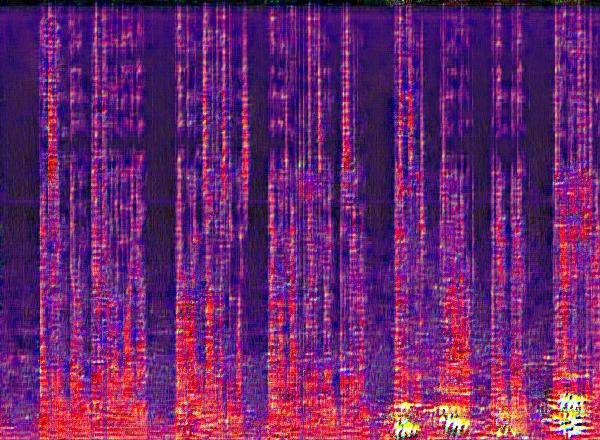

ZeroDivisionError: division by zero

In [6]:
#test_model = resnet
#test_model = inception
test_model = sound2image

# Guide features
#guide_features = test_model.forward(guide_variable,n_layer=dream_dict[dict_target]['end_layer'])
guide_features = None
# ------------------
# Writing parameters
# ------------------
filepath = './deepdream/data/written_dreams/sitting_room/'
write_out = False
# To calculate total frames needed for desired length of video
fps = 20
video_min = 0
video_sec = 5
#----Edit above------
total_frames = ((60*video_min) + video_sec) * fps
print("Total frames:"+str(total_frames))
#--------------------
total_frames = 2

# ------------------
# Synthesize! ~*~*~*
# ------------------

dream(test_model, input_np,
      zoom_depth=total_frames,
      filepath=filepath,
      write=write_out,
      zoom_interval=dream_dict[dict_target]['zoom_interval'],
      zoom_orientation=dream_dict[dict_target]['zoom_orientation'],
      nproll=dream_dict[dict_target]['nproll'],
      fade_alpha=dream_dict[dict_target]['fade_alpha'],
      octave_n=dream_dict[dict_target]['octave_n'], 
      num_iterations=dream_dict[dict_target]['num_iterations'], 
      lr=dream_dict[dict_target]['lr'],
      max_jitter=dream_dict[dict_target]['max_jitter'],
      show_every=dream_dict[dict_target]['show_every'],
      end_layer=dream_dict[dict_target]['end_layer'],
      neuron_unit=dream_dict[dict_target]['neuron_unit'],
      stream_out=dream_dict[dict_target]['stream_out'],
      zoom_echo=dream_dict[dict_target]['zoom_echo'],
      awaken=dream_dict[dict_target]['awaken'],
      awaken_alpha=dream_dict[dict_target]['awaken_alpha'],
      objective=objective_deepdream,
      guide_features = guide_features,
      use_gpu = True,
      clear_out = True
     )

 - 0 ends with white, black and yellow square
 - 1 early nintendo trees
 - 2 simple triangles
 - 3 is triangly, like 2 of resnet, sort of
 - 6 has ribbons and flowery grass stuff
 - 7 cup things
 - 8 is kind of Picaso-y (without maxpool2d)
 - 9 is rainbowy flower pedals (without maxpool2d)
 - 10 is picasso-y. I see lots of different types of shapes
 - 11 not quite eye-balls, round stuff. pretty. like ornaments.
 - 12
 - 13 paired with dog produces some dogs
 - 14 paired with dog produces some dogs
 - 15 maybe telephone pole and dog and crazy structures, but a lot of complexity...
 - 16
 - 17

Dope stuff:
 - 'end_layer':2,'neuron_unit':30, top-down walls in the desert, | 
 - 'end_layer':2,'neuron_unit':29, blue meanie
 - 'end_layer':2,'neuron_unit':28, floating broken gates
 - 'end_layer':2,'neuron_unit':27, top-down walls in the desert, \ , blue orange yellow, black
 - 'end_layer':2,'neuron_unit':26, bacteria
 - 'end_layer':2,'neuron_unit':25, glitchy puzzle piece walls
 - 'end_layer':2,'neuron_unit':24, arcade bacteria, pink and green
 - 'end_layer':6,'neuron_unit':180, catarpillar zebra stripes
 - 'end_layer':6,'neuron_unit':160, rainbow zig-zag land
 - 'end_layer':6,'neuron_unit':140, cactar plumes

In [ ]:
# inception.eval()
# inception.forward(X_Variable,3)

In [ ]:
import numpy as np
import torch
from deepdream.util import showtensor, streamtensor, writetensor
import scipy.ndimage as nd
from torch.autograd import Variable
import scipy
import random


# -------------------------------------
# ~*~*~*~*~ Objective guides~*~*~*~*~*~
# -------------------------------------

# def obective_neuron_L2(dst, guide_features,neuron):
#     return dst[:,:,:,neuron]

def objective_L2(dst, guide_features, neuron_unit):
    return dst.data[:,:,:,:]


def objective_deepdream(dst, guide_features, neuron_unit):
    return dst.data[:,:,:,:]**2


def objective_channel(dst, guide_features, neuron_unit):
    return dst.data[:,neuron_unit,:,:]

# def objective_neuron(dst, guide_features, neuron_unit):
#     return dst.data[:,neuron_unit,h,w]

def objective_guide(dst, guide_features, neuron_unit):
    
    
    # Pytorch implementation
    # ----------------------
    
    x = dst.data[0].clone()
    y = guide_features.data[0]
    
    ch, h, w = x.shape
    x = x.view(ch,-1).transpose_(0,1) # (c，w*h)
    y = y.view(ch,-1)
    
    # matrix-wise dot product, for 1d use torch.dot()
    A = torch.mm(x,y) 
    _,max_vals = torch.max(A,1) # argmax
    
    # Select max value indices, reshape and a dim
    result = y[:,max_vals].view(ch,h,w).unsqueeze_(0)
    return result
    
    # Original numpy implementation
    # -----------------------------
    
#     x = dst.data[0].cpu().numpy().copy()
#     y = guide_features.data[0].cpu().numpy()
#     ch, w, h = x.shape
#     x = x.reshape(ch,-1).T    # (c，w*h)
#     y = y.reshape(ch,-1)      # (c, w*h)
#     A = x.dot(y) # compute the matrix of dot-products with guide features
#     max_vals = A.argmax(1)
#     result = y[:,max_vals] # select ones that match best
#     result = torch.Tensor(np.array([result.reshape(ch, w, h)], dtype=np.float)).cuda()
#     return result


def objective_guide_channel(dst, guide_features, neuron_unit):
    
#     dst = dst.data[:,neuron_unit,:,:]
#     guide_features = guide_features.data[:,neuron_unit,:,:]

    x = dst.data[0,neuron_unit,:,:].clone()
    y = guide_features.data[0,neuron_unit,:,:]
    
    # Need to update this to account for 2d tensor
    h, w = x.shape
    x = x.view(h,-1).transpose_(0,1) # (c，w*h)
    y = y.view(h,-1)
        
    print(x.shape)
    print(y.shape)
    
    # matrix-wise dot product, for 1d use torch.dot()
    A = torch.mm(x,y) 
    _,max_vals = torch.max(A,1) # argmax
    
    # Select max value indices, reshape and a dim
    result = y[:,max_vals].view(h,w).unsqueeze_(0)
    return result

# --------------------------------
# ~*~*~*~*~ Image zoom ~*~*~*~*~*~
# --------------------------------

# def tensor_roll(tensor, shift, axis):
#     if shift == 0:
#         return tensor

#     if axis < 0:
#         axis += tensor.dim()

#     dim_size = tensor.size(axis)
#     after_start = dim_size - shift
#     if shift < 0:
#         after_start = -shift
#         shift = dim_size - abs(shift)

#     before = tensor.narrow(axis, 0, dim_size - shift)
#     after = tensor.narrow(axis, after_start, shift)
#     return torch.cat([after, before], axis)


def resize(img,h_scale,w_scale):
    img = scipy.ndimage.zoom(img[0], (1,h_scale,w_scale))
    img = np.expand_dims(img, axis=0)
    return img


def crop_zoom(img,zoom_interval,zoom_orientation,nproll,oscillator=None):
    h,w = img.shape[-2:]
    
    if nproll is not None:
        # int(zoom_interval/2) clips down middle when using strings
        roll_n = random.randint(0,5)
        #roll_n = perlin(zoom_interval)
        if zoom_orientation is 'right':
            img = np.roll(img,-roll_n)
        else:
            img = np.roll(img,roll_n)

    if zoom_orientation is not None:
        if zoom_orientation=='center':
            img = img[:,:,zoom_interval:-zoom_interval,zoom_interval:-zoom_interval]
        elif zoom_orientation=='strings':
            img = img[:,:,zoom_interval:-zoom_interval,0:zoom_interval]
        elif zoom_orientation=='oscillate':
            img = img[:,:,zoom_interval:-zoom_interval-oscillator,zoom_interval:-zoom_interval+oscillator]
        elif zoom_orientation=='sin':
            try:
                i += 1
            except:
                i = 0
                sin_range = [i for i in np.arange(0,zoom_interval,.1)]

            zi = int(abs(np.sin(i)*100))*10
            if zi <= 0:
                zi = 1
            img = img[:,:,zi:-zi,zi:-zi]
        else:
            img = img[:,:,zoom_interval:-zoom_interval,zoom_interval:-zoom_interval]

        h_scale = h/img.shape[2]
        w_scale = w/img.shape[3]
        img = resize(img,h_scale,w_scale)
    
    return img

# ----------------------------------
# ~*~*~*~*~ Optimization ~*~*~*~*~*~
# ----------------------------------

def zoom_step(X, model,end_layer,neuron_unit,write=False,use_gpu=True,stream_out=False, **kwargs):

    mean = np.array([0.485, 0.456, 0.406]).reshape([3, 1, 1])
    std = np.array([0.229, 0.224, 0.225]).reshape([3, 1, 1])

    learning_rate = kwargs.pop('lr', 5.0)
    max_jitter = kwargs.pop('max_jitter', 100)
    num_iterations = kwargs.pop('num_iterations', 100)
    show_every = kwargs.pop('show_every', 25)
    #end_layer = kwargs.pop('end_layer', 3)
    object = kwargs.pop('objective', objective_L2)
    guide_features = kwargs.pop('guide_features', None)
    
    for t in range(num_iterations):
        
        # Add jitter
        ox, oy = np.random.randint(-max_jitter, max_jitter + 1, 2)
        X = np.roll(np.roll(X, ox, -1), oy, -2)
        
        model.zero_grad()
        X_tensor = torch.Tensor(X)
        
        if use_gpu: X_Variable = Variable(X_tensor.cuda(), requires_grad=True)
        else: X_Variable = Variable(X_tensor.cpu(), requires_grad=True)

        # -----------------------------------------
        # ~*~*~*~*~*~ Optimization step ~*~*~*~*~*~
        # -----------------------------------------
        
        act_value = model.forward(X_Variable,end_layer,neuron_unit)
        diff_out = object(act_value, guide_features, neuron_unit)
        
        if object is objective_channel:
            act_value = act_value[:,neuron_unit,:,:]
        #if object is objective_neuron:
        #    act_value = act_value[:,neuron_unit,h,w]
            
        act_value.backward(diff_out)

        #learning_rate_ = learning_rate / np.abs(X_Variable.grad.data.cpu().numpy()).mean()
        learning_rate_ = learning_rate / torch.mean(torch.abs(X_Variable.grad.data))
    
        X_Variable.data.add_(X_Variable.grad.data * learning_rate_)
        
        # Convert this to tensor instead of using np (do on GPU)
        X = X_Variable.data.cpu().numpy()
        X = np.roll(np.roll(X, -ox, -1), -oy, -2)
        #X[0, :, :, :] = np.clip(X[0, :, :, :], -mean / std, (1. - mean) / std)
        X[0] = np.clip(X[0], -mean / std, (1. - mean) / std)

            
        if stream_out:
            if t == 0 or (t + 1) % show_every == 0:
                if not write:
                    streamtensor(X)
                else:
                    writetensor(X,filepath=filepath)
            
    return X


# ---------------------------------------
# ~*~*~*~*~ Generator wrapper ~*~*~*~*~*~
# ---------------------------------------

def zoom_dream(model, base_img, end_layer,neuron_unit,zoom_depth=20,zoom_interval=10,zoom_orientation=None,
               nproll=None,fade_alpha=.3, octave_n=4, octave_scale=1.4, end='', write=False,use_gpu=True,
               stream_out=False,zoom_echo=False,awaken=False,awaken_alpha=0.1,**step_params):
    

    receive_socket = False

    root_img = base_img.copy()
    
#     if not write:
#         streamtensor(root_img)
#     else:
#         writetensor(root_img,filepath=filepath)
    streamtensor(root_img)
        
    #streamtensor(resize(root_img,3,3))

    mean = np.array([0.485, 0.456, 0.406]).reshape([3, 1, 1])
    std = np.array([0.229, 0.224, 0.225]).reshape([3, 1, 1])
    octaves = [base_img]
    for i in range(octave_n - 1):
        octaves.append(nd.zoom(octaves[-1], (1, 1, 1.0 / octave_scale, 1.0 / octave_scale), order=1))

    detail = np.zeros_like(octaves[-1])
    for octave, octave_base in enumerate(octaves[::-1]):
        h, w = octave_base.shape[-2:]
        if octave > 0:
            h1, w1 = detail.shape[-2:]
            detail = nd.zoom(detail, (1, 1, 1.0 * h / h1, 1.0 * w / w1), order=1)

        base_img = octave_base + detail
    
    loop_count=0
    j=0
    oscillator = 1
    oscillator_direction = 'positive'
    
    current_img_idx = 0
    #while True:
    for frames in range(0,zoom_depth):
        
        try:
#             if receive_socket:
                
            # ---- Zoom Dream --------------#        
#             if zoom_echo:
#                 if write:
#                     writetensor(base_img,filepath=filepath)
#                 else:
#                     streamtensor(base_img)
                #streamtensor(base_img)

            base_img = zoom_step(base_img, model, end_layer=end_layer,neuron_unit=neuron_unit,**step_params,use_gpu=use_gpu,stream_out=stream_out)

            streamtensor(base_img)
#             if not write:
#                 streamtensor(base_img)
#             else:
#                 writetensor(base_img,filepath=filepath)
            
            base_img = crop_zoom(base_img,zoom_interval,zoom_orientation,nproll,oscillator) * ((1.0 - fade_alpha) + base_img * fade_alpha)
                
            #WHOAAA:
            #base_img = crop_zoom(base_img,zoom_interval,zoom_orientation) * (1.0 - fade_alpha) + base_img * fade_alpha - 150

            #if awaken:
                #if not z % 3:
                    #base_img = crop_zoom(base_img,zoom_interval,zoom_orientation) * (1.0 - fade_alpha) + base_img * fade_alpha
            #if awaken:
                #if not z % 5:
                    #base_img = crop_zoom(base_img,zoom_interval,zoom_orientation) * (1.0 - awaken_alpha) + awaken_alpha * root_img
                    #prior_img = base_img.copy()
                #if i % 2:
                    # interesting effect: root_img * prior_img, instead of awaken_alpha * prior_img
                    #base_img = crop_zoom(base_img,zoom_interval,zoom_orientation) * (1.0 - awaken_alpha) + awaken_alpha * prior_img
                    #base_img = crop_zoom(base_img,zoom_interval,zoom_orientation) * (1.0 - awaken_alpha) + awaken_alpha * root_img

            #if not i % 2:
            #        prior_img = base_img.copy()
            #base_img = crop_zoom(base_img,zoom_interval,zoom_orientation) * (1.0 - awaken_alpha) + awaken_alpha * prior_img

            # regular zoom
            #base_img = crop_zoom(base_img,zoom_interval,zoom_orientation)
            # ---- Sound control --------------#   
#             if receive_socket:
#                 if predicted_sound == 'Dog Bark':
#                     #base_img = crop_zoom(base_img,zoom_interval,zoom_orientation) * (1.0 - predicted_prob) + (predicted_prob) * root_img
#                     base_img = root_img.copy()
        
            loop_count += 1
            
#             if loop_count % 5 == 0: 
#                     #loop_count=0
#                 end_layer+=1
#                 if end_layer == 4:
#                     end_layer = 0
                #lr = 0.51
#             else:
#                 end_layer = 3
#                 lr = 0.21
            
            # Class update test
            # -----------------
            # This is too much of just an image "behind" the deep dream.
            # The deep dream itself needs to be a response to the sounds...
#             if not loop_count % 10: 
#                 base_img = (base_img) + (img_bucket[current_img_idx]*.5)
#                 #use np.array roll
#                 current_img_idx += 1
#                 if current_img_idx == len(img_bucket)-1:
#                     current_img_idx = 0
            
            # Layer oscillator
            # ----------------
            if zoom_orientation == 'oscillate':
            
                if (oscillator + zoom_interval) > (base_img.shape[2]/2 - 20):
                    oscillator_direction = 'negative'
                if (oscillator + zoom_interval) < 6:
                    oscillator_direction = 'positive'


                if loop_count % 2 == 0: 
                    #loop_count=0
                    #end_layer=1
                    if oscillator_direction is 'positive':
                        oscillator += 4
                    else:
                        oscillator -= 4

                    #j+=1
                    #if not j % 2:
                        #zoom_orientation = 'center'

                else:
                    #end_layer = 3
                    if oscillator_direction is 'positive':
                        oscillator -= 2
                    else:
                        oscillator += 2

                    #if not j % 3:
                        #zoom_orientation = 'center'
                        #base_img = crop_zoom(base_img,zoom_interval,zoom_orientation) * (1.0 - fade_alpha) + base_img * fade_alpha - 10


        except KeyboardInterrupt:
            if receive_socket:
                s.close()
            break
            

In [ ]:
img_id = 4

base_dream_path = './deepdream/data/target/'

#scale = (720,450)
# scale = (200,150)
scale = 200

transform = transforms.Compose([
    transforms.Scale(scale),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ])

dream_set = dset.ImageFolder(base_dream_path,transform=transform)
dset_loader = torch.utils.data.DataLoader(dream_set, batch_size=1)
inputs_guide = dset_loader.dataset[img_id][0].unsqueeze(0)
ddutil.showtensor(inputs_guide.numpy())

# Control the dream
guide_variable = Variable(inputs_guide.cuda())

# Inception
# ---------
#guide_features = inception.forward(guide_variable, n_layer=5, neuron_unit=None)

# Resnet
# ---------
guide_features = resnet.forward(guide_variable, n_layer=3, neuron_unit=None)

In [ ]:
dream_dict['ars_test'] = {'zoom_interval':zoom_factor,'nproll':None,'zoom_orientation':'center','fade_alpha':0.1,
                          'octave_n':1,'num_iterations':10,'lr':0.2,'max_jitter':10000,'show_every':1,
                          'end_layer':3,'neuron_unit':0,
                          'stream_out':False,'zoom_echo':False,'awaken':False,'awaken_alpha':0.0}

dict_target = 'ars_test'

In [ ]:
zoom_dream(inception, input_np, 
           zoom_depth=total_frames,
           file_path=filepath,
           write=write_out,
           zoom_interval=dream_dict[dict_target]['zoom_interval'],
           zoom_orientation=dream_dict[dict_target]['zoom_orientation'],
           nproll=dream_dict[dict_target]['nproll'],
           fade_alpha=dream_dict[dict_target]['fade_alpha'],
           octave_n=dream_dict[dict_target]['octave_n'], 
           num_iterations=dream_dict[dict_target]['num_iterations'], 
           lr=dream_dict[dict_target]['lr'],
           max_jitter=dream_dict[dict_target]['max_jitter'],
           show_every=dream_dict[dict_target]['show_every'],
           end_layer=dream_dict[dict_target]['end_layer'],
           neuron_unit=dream_dict[dict_target]['neuron_unit'],
           stream_out=dream_dict[dict_target]['stream_out'],
           zoom_echo=dream_dict[dict_target]['zoom_echo'],
           awaken=dream_dict[dict_target]['awaken'],
           awaken_alpha=dream_dict[dict_target]['awaken_alpha'],
           objective=objective_guide,
           guide_features = guide_features
          )